In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from numpy import genfromtxt
data1 = genfromtxt('data1.csv', delimiter=',')
X = data1[:,:-1]
y = data1[:, -1]


(60, 50)


In [1]:
from sklearn.decomposition import PCA


In [2]:
from sklearn.cluster import KMeans


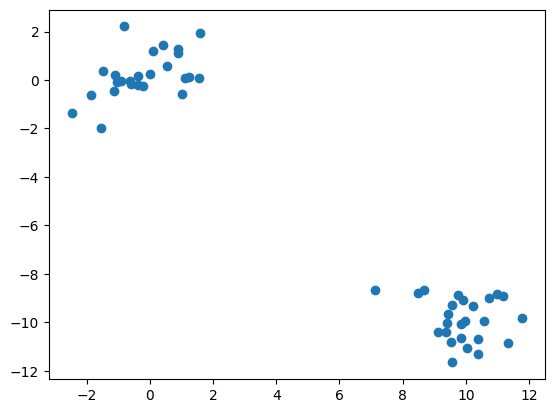

In [7]:
data2 = np.genfromtxt('data2.csv', delimiter=',')
plt.scatter(data2[:,0], data2[:,1])

In [8]:
# Inter Observational Distance

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
